In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

In [2]:
#Read file
df = pd.read_csv('/content/heart.csv')

In [3]:
#Print the first five rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
# Missing values
missing_values = df.isnull().sum()
print(f"Missing values in the DataFrame:\n{missing_values}\n")

Missing values in the DataFrame:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64



In [9]:
# Splitting the data into training and test set
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [26]:
#Predict and display results
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy (%):", accuracy)
print(classification_report(y_test, y_pred))


Accuracy (%): 68.78048780487805
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       102
           1       0.68      0.73      0.70       103

    accuracy                           0.69       205
   macro avg       0.69      0.69      0.69       205
weighted avg       0.69      0.69      0.69       205



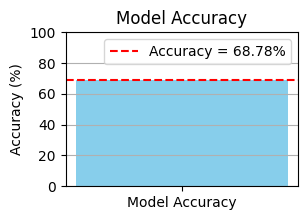

In [15]:
#Draw the result
labels = ['Model Accuracy']
values = [accuracy]
plt.figure(figsize=(3, 2))
plt.bar(labels, values, color='skyblue')
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.grid(axis='y')
plt.axhline(y=accuracy, color='r', linestyle='--', label=f'Accuracy = {accuracy:.2f}%')
plt.legend()
plt.show()

In [27]:
# Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [28]:
#Predict and display results
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy (%):", accuracy)
print(classification_report(y_test, y_pred))

Accuracy (%): 80.0
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



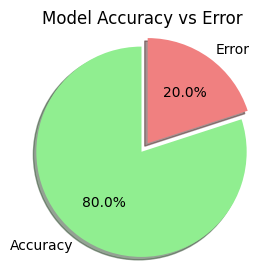

In [20]:
#Draw the result
labels = ['Accuracy', 'Error']
sizes = [accuracy, 100 - accuracy]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # لإبراز جزء الدقة
plt.figure(figsize=(3, 3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # لتكون الدائرة متساوية
plt.title('Model Accuracy vs Error')
plt.show()

In [29]:
# DecisionTree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
#Predict and display results
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100  # ضرب الدقة في 100
print("Accuracy (%):", accuracy)
print(classification_report(y_test, y_pred))

Accuracy (%): 98.53658536585365
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



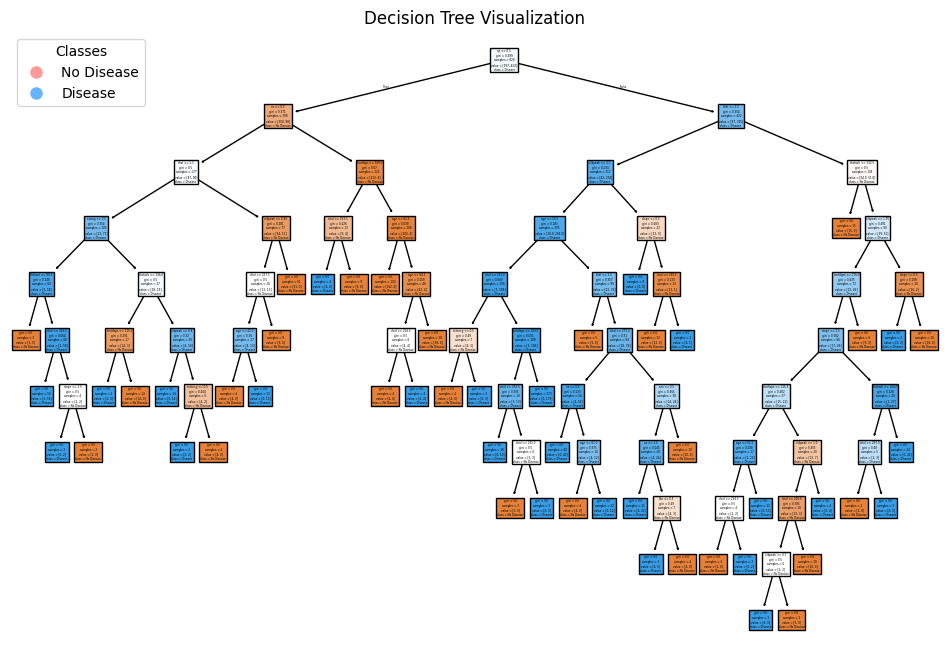

In [23]:
#Decision tree drawing
plt.figure(figsize=(12,8))
tree_plot = tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
colors = ['#ff9999', '#66b3ff']
labels = ['No Disease', 'Disease']
patches = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                        markerfacecolor=color, markersize=10) for label, color in zip(labels, colors)]
plt.legend(handles=patches, loc='upper left', title="Classes")
plt.title("Decision Tree Visualization")
plt.show()